Let's make an EDA to understand better out datas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import squarify


In [2]:
df = pd.read_csv("final_Start-Up.csv")

df.drop(columns=["Unnamed: 0"], inplace=True)

Work in progress

In [3]:
df.columns

Index(['category_list', 'funding_total_usd', 'status', 'country_code',
       'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')

C:\Users\theof\AppData\Local\Temp\ipykernel_9008\2263699784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


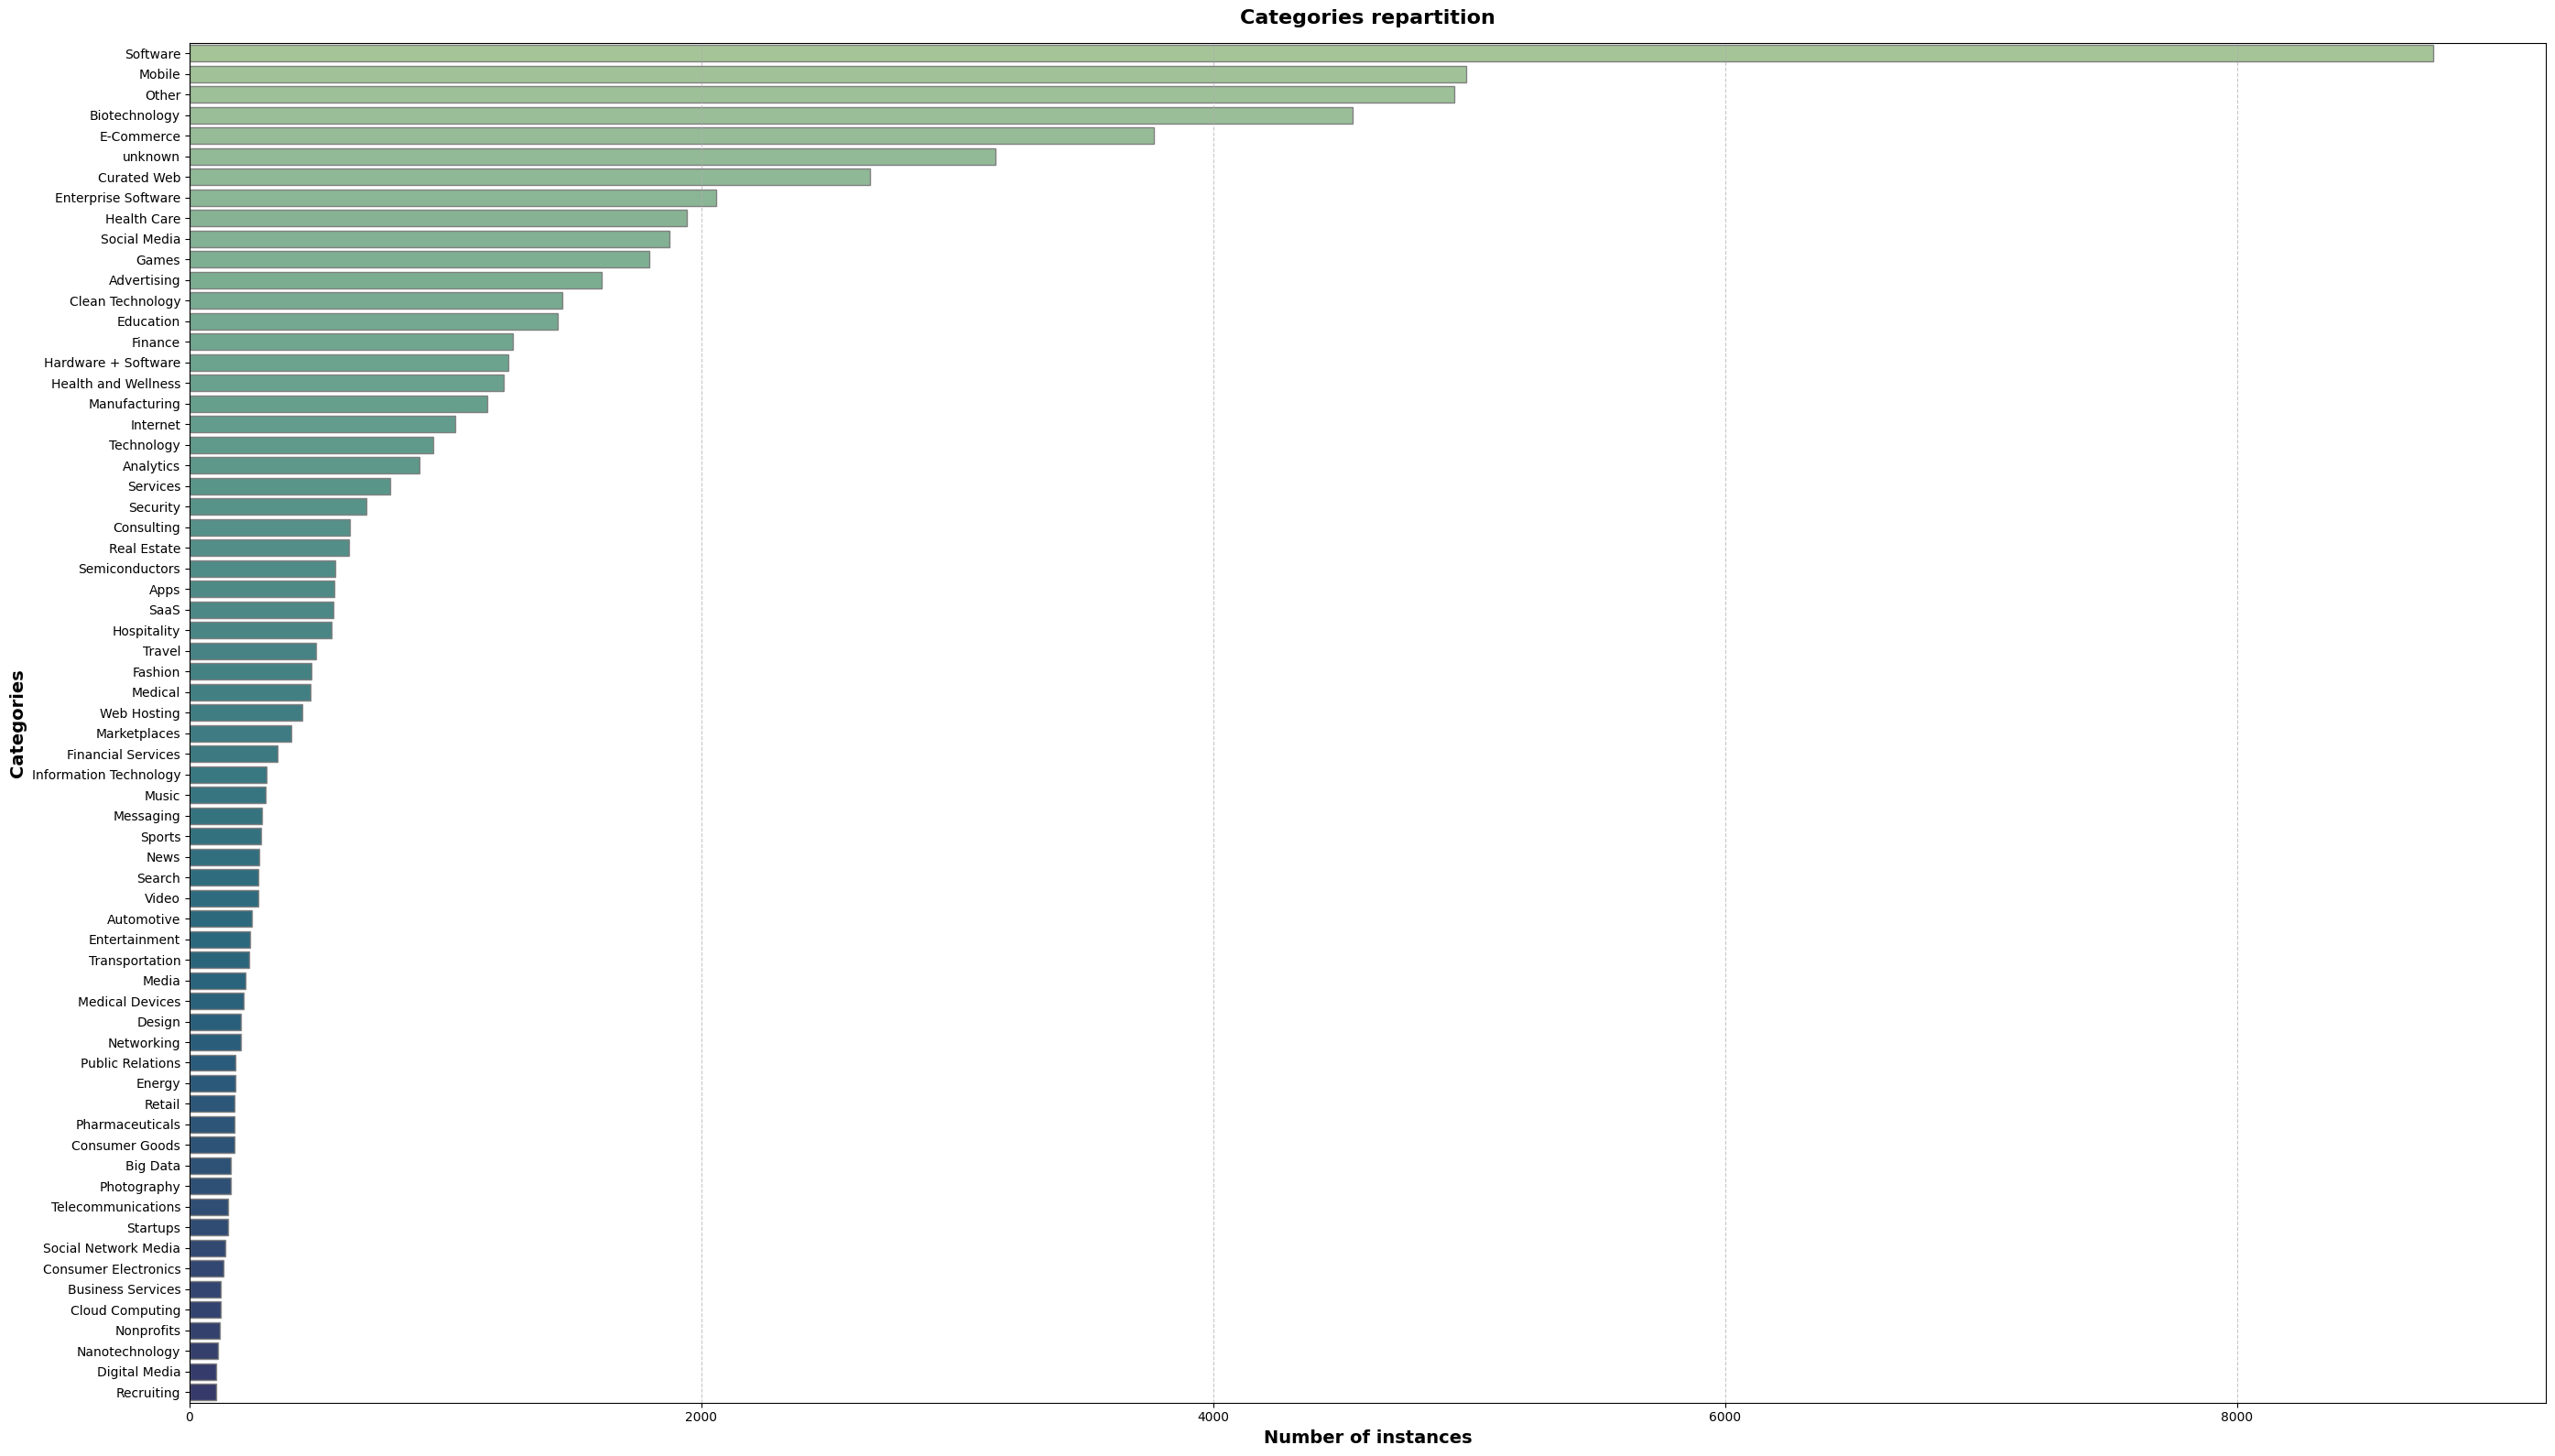

In [4]:

category_counts = df['category_list'].value_counts()


# Tracer le graphique
plt.figure(figsize=(28, 16))
sns.barplot(
    x=category_counts.values, 
    y=category_counts.index, 
    palette="crest",  # Changer la palette de couleurs
    edgecolor="grey"
)

# Améliorer l'apparence
plt.xlabel("Number of instances", fontsize=14, fontweight="bold")
plt.ylabel("Categories", fontsize=14, fontweight="bold")
plt.title("Categories repartition", fontsize=16, fontweight="bold", pad=15)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


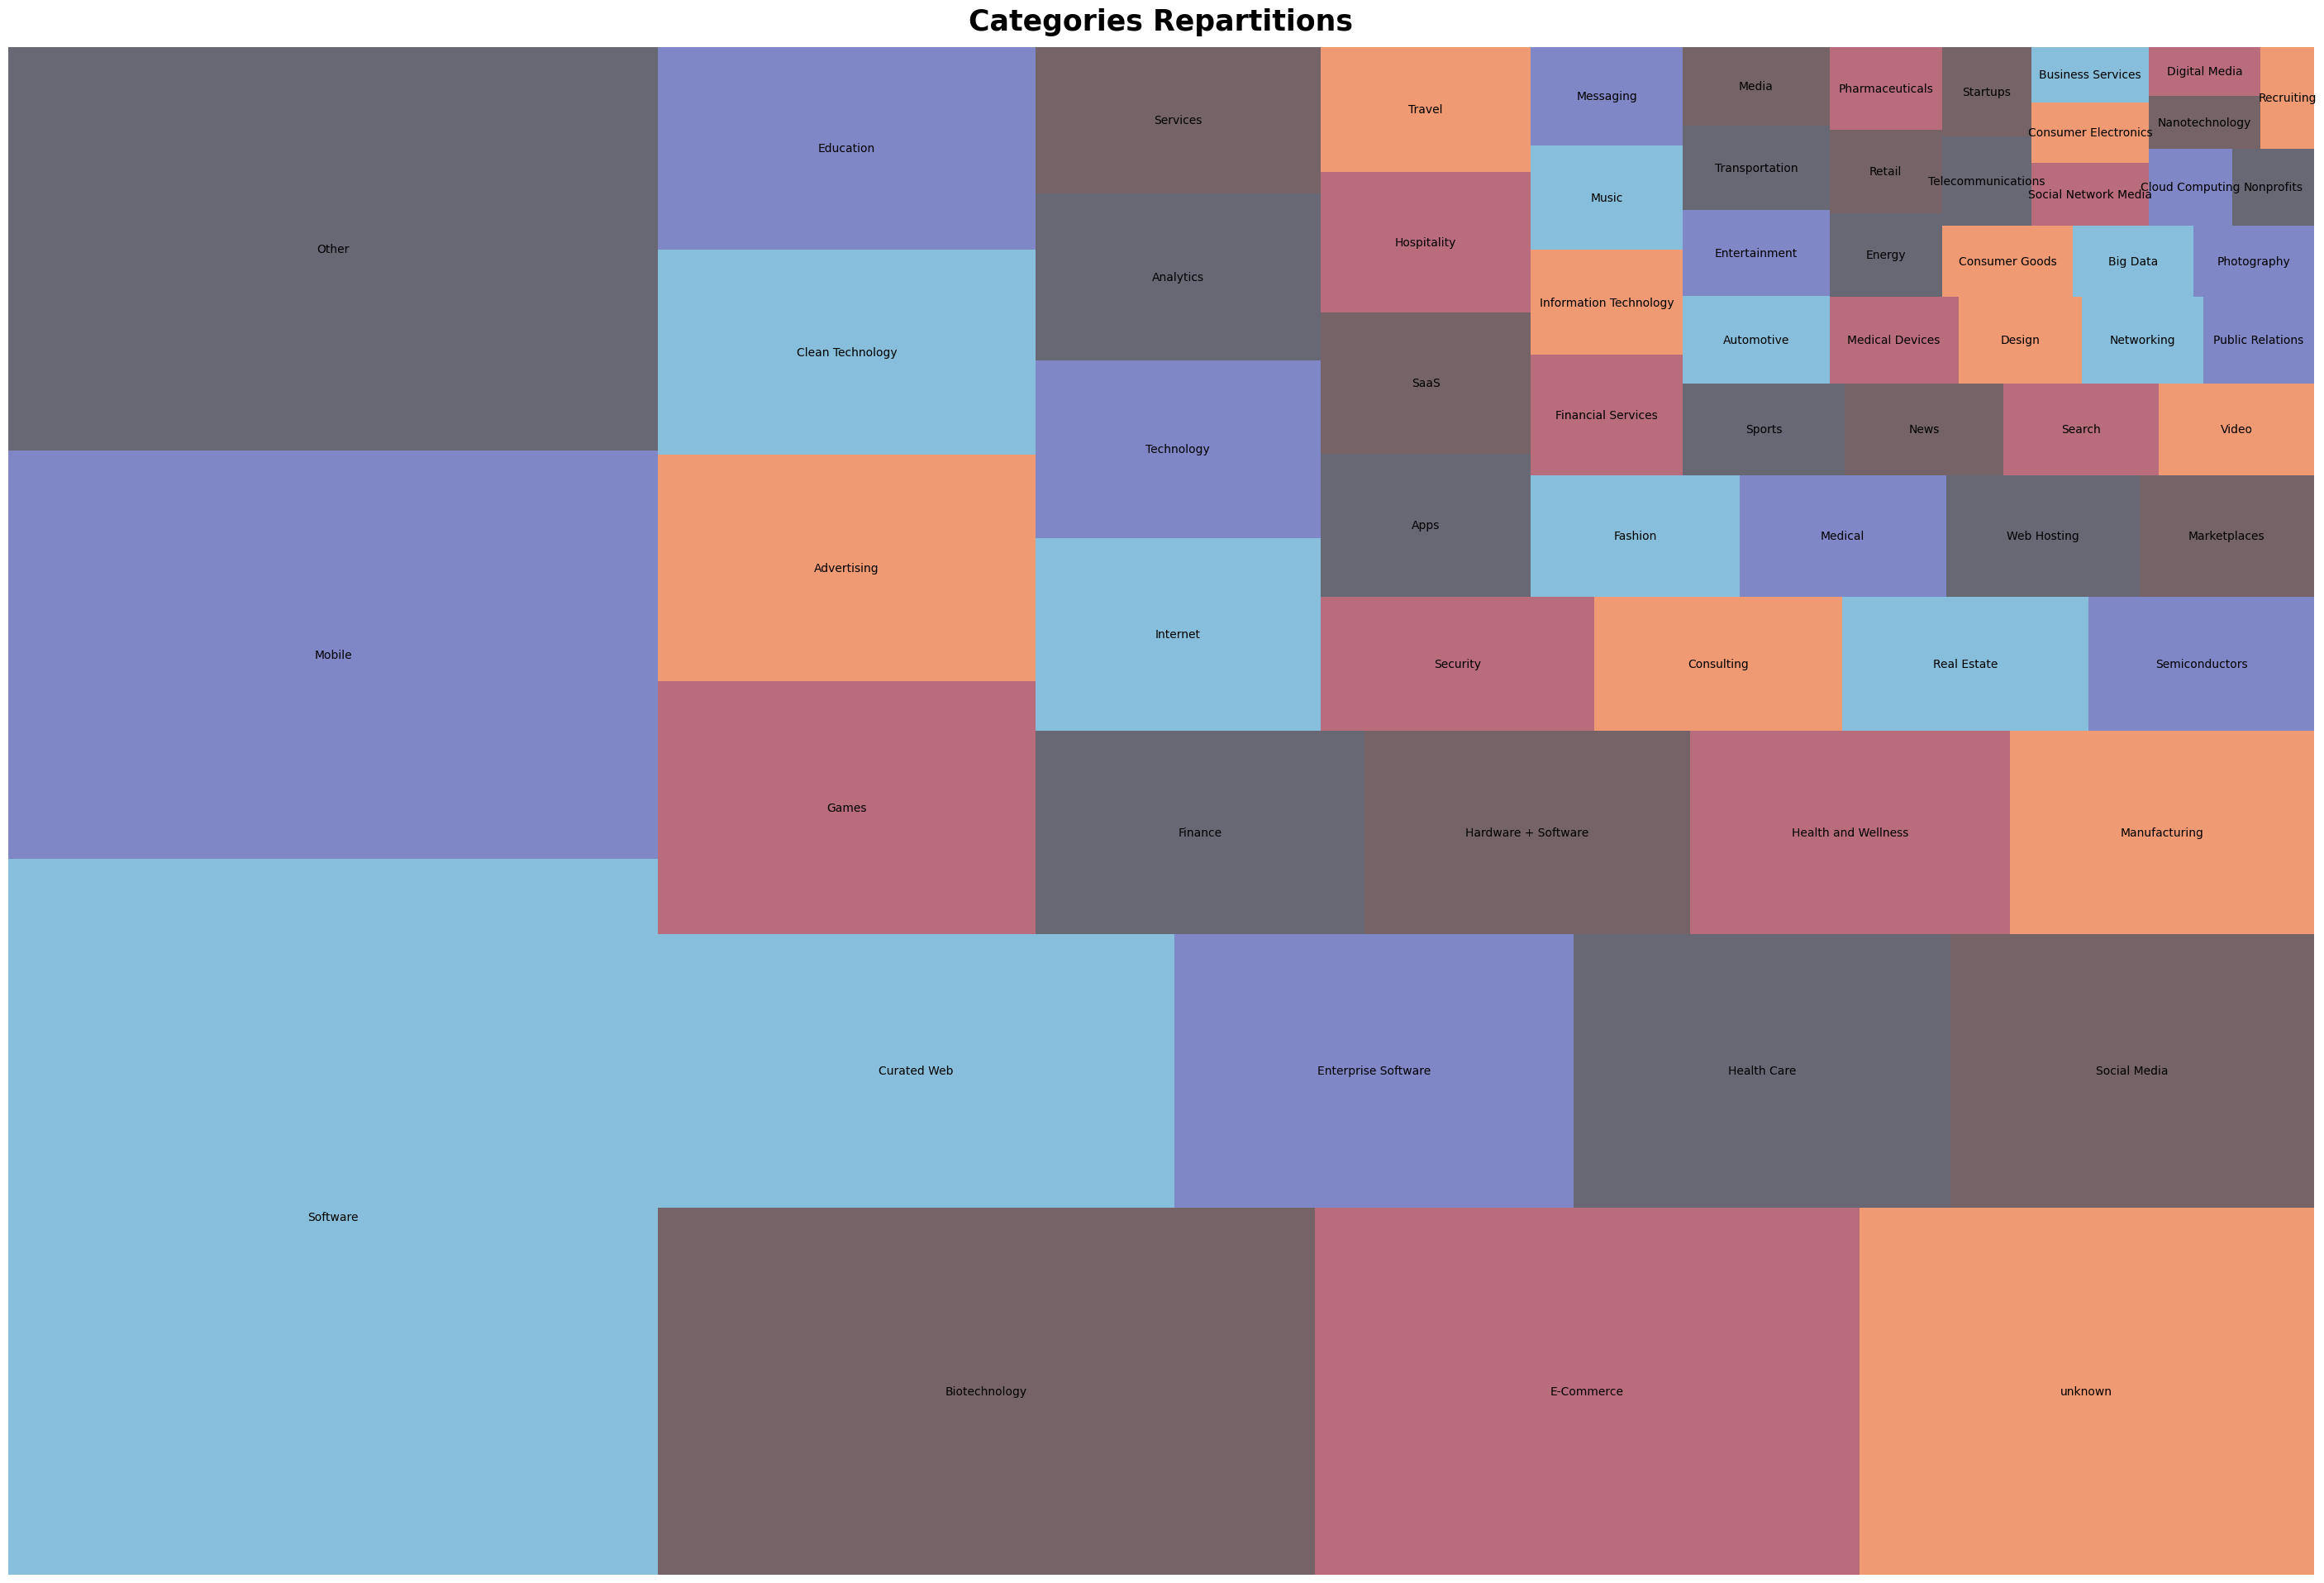

In [5]:

# Création d'une figure
colors = sns.color_palette("icefire")


plt.figure(figsize=(36, 24))
squarify.plot(sizes=category_counts, label=category_counts.index, alpha=0.7, color = colors)
plt.axis('off')
plt.title("Categories Repartitions",fontsize=25, fontweight="bold", pad=15)
plt.show()


In [6]:
df["funding_total_usd"] = pd.to_numeric(df["funding_total_usd"], errors="coerce")
print(df["funding_total_usd"].isna().sum())  # Nombre de NaN après conversion


12785


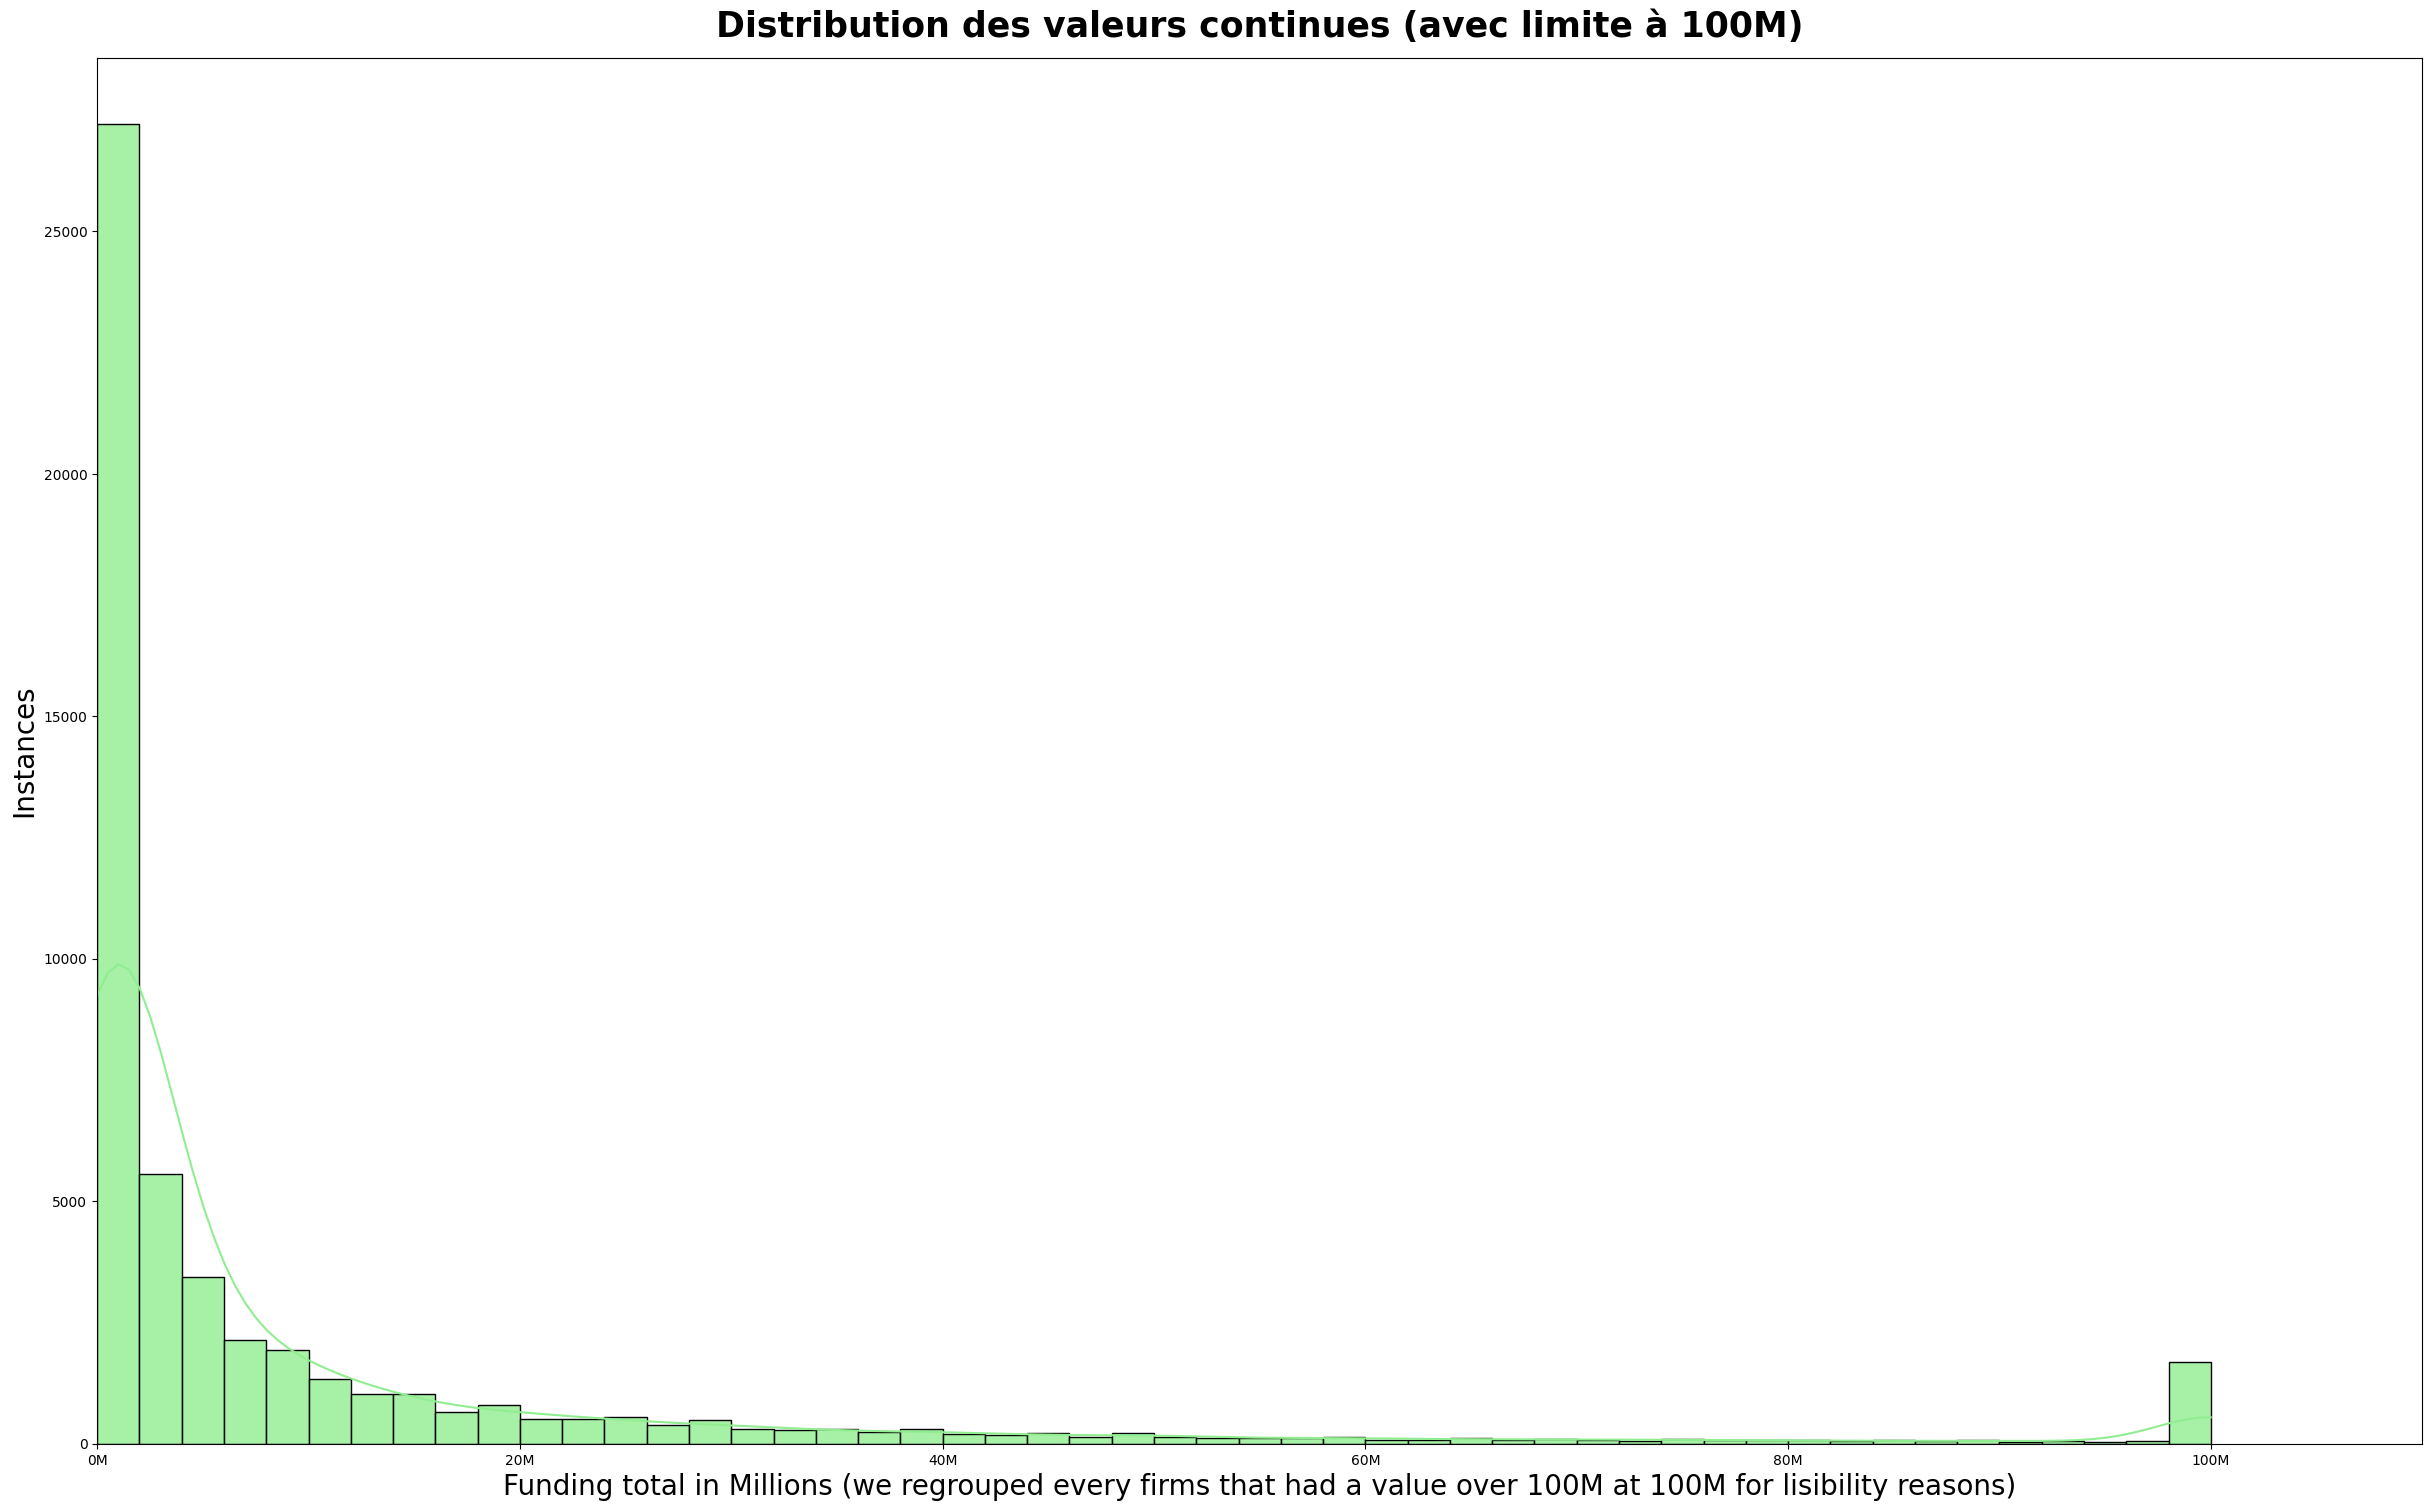

In [7]:



plt.figure(figsize=(30, 18))

# Remplacer les valeurs > 100M uniquement pour l'affichage
sns.histplot(np.where(df["funding_total_usd"] > 100e6, 100e6, df["funding_total_usd"]),
             bins=50, kde=True, color = "lightgreen", alpha = 0.8)



# Reformater l’axe des X pour l’afficher en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xlim(0, 110e6)  # Définir un axe de 0 à 110M USD
plt.xlabel("Funding total in Millions (we regrouped every firms that had a value over 100M at 100M for lisibility reasons)", fontsize=20)
plt.ylabel("Instances", fontsize=20)
plt.title("Distribution des valeurs continues (avec limite à 100M)",fontsize=25, fontweight="bold", pad=15 )
plt.show()




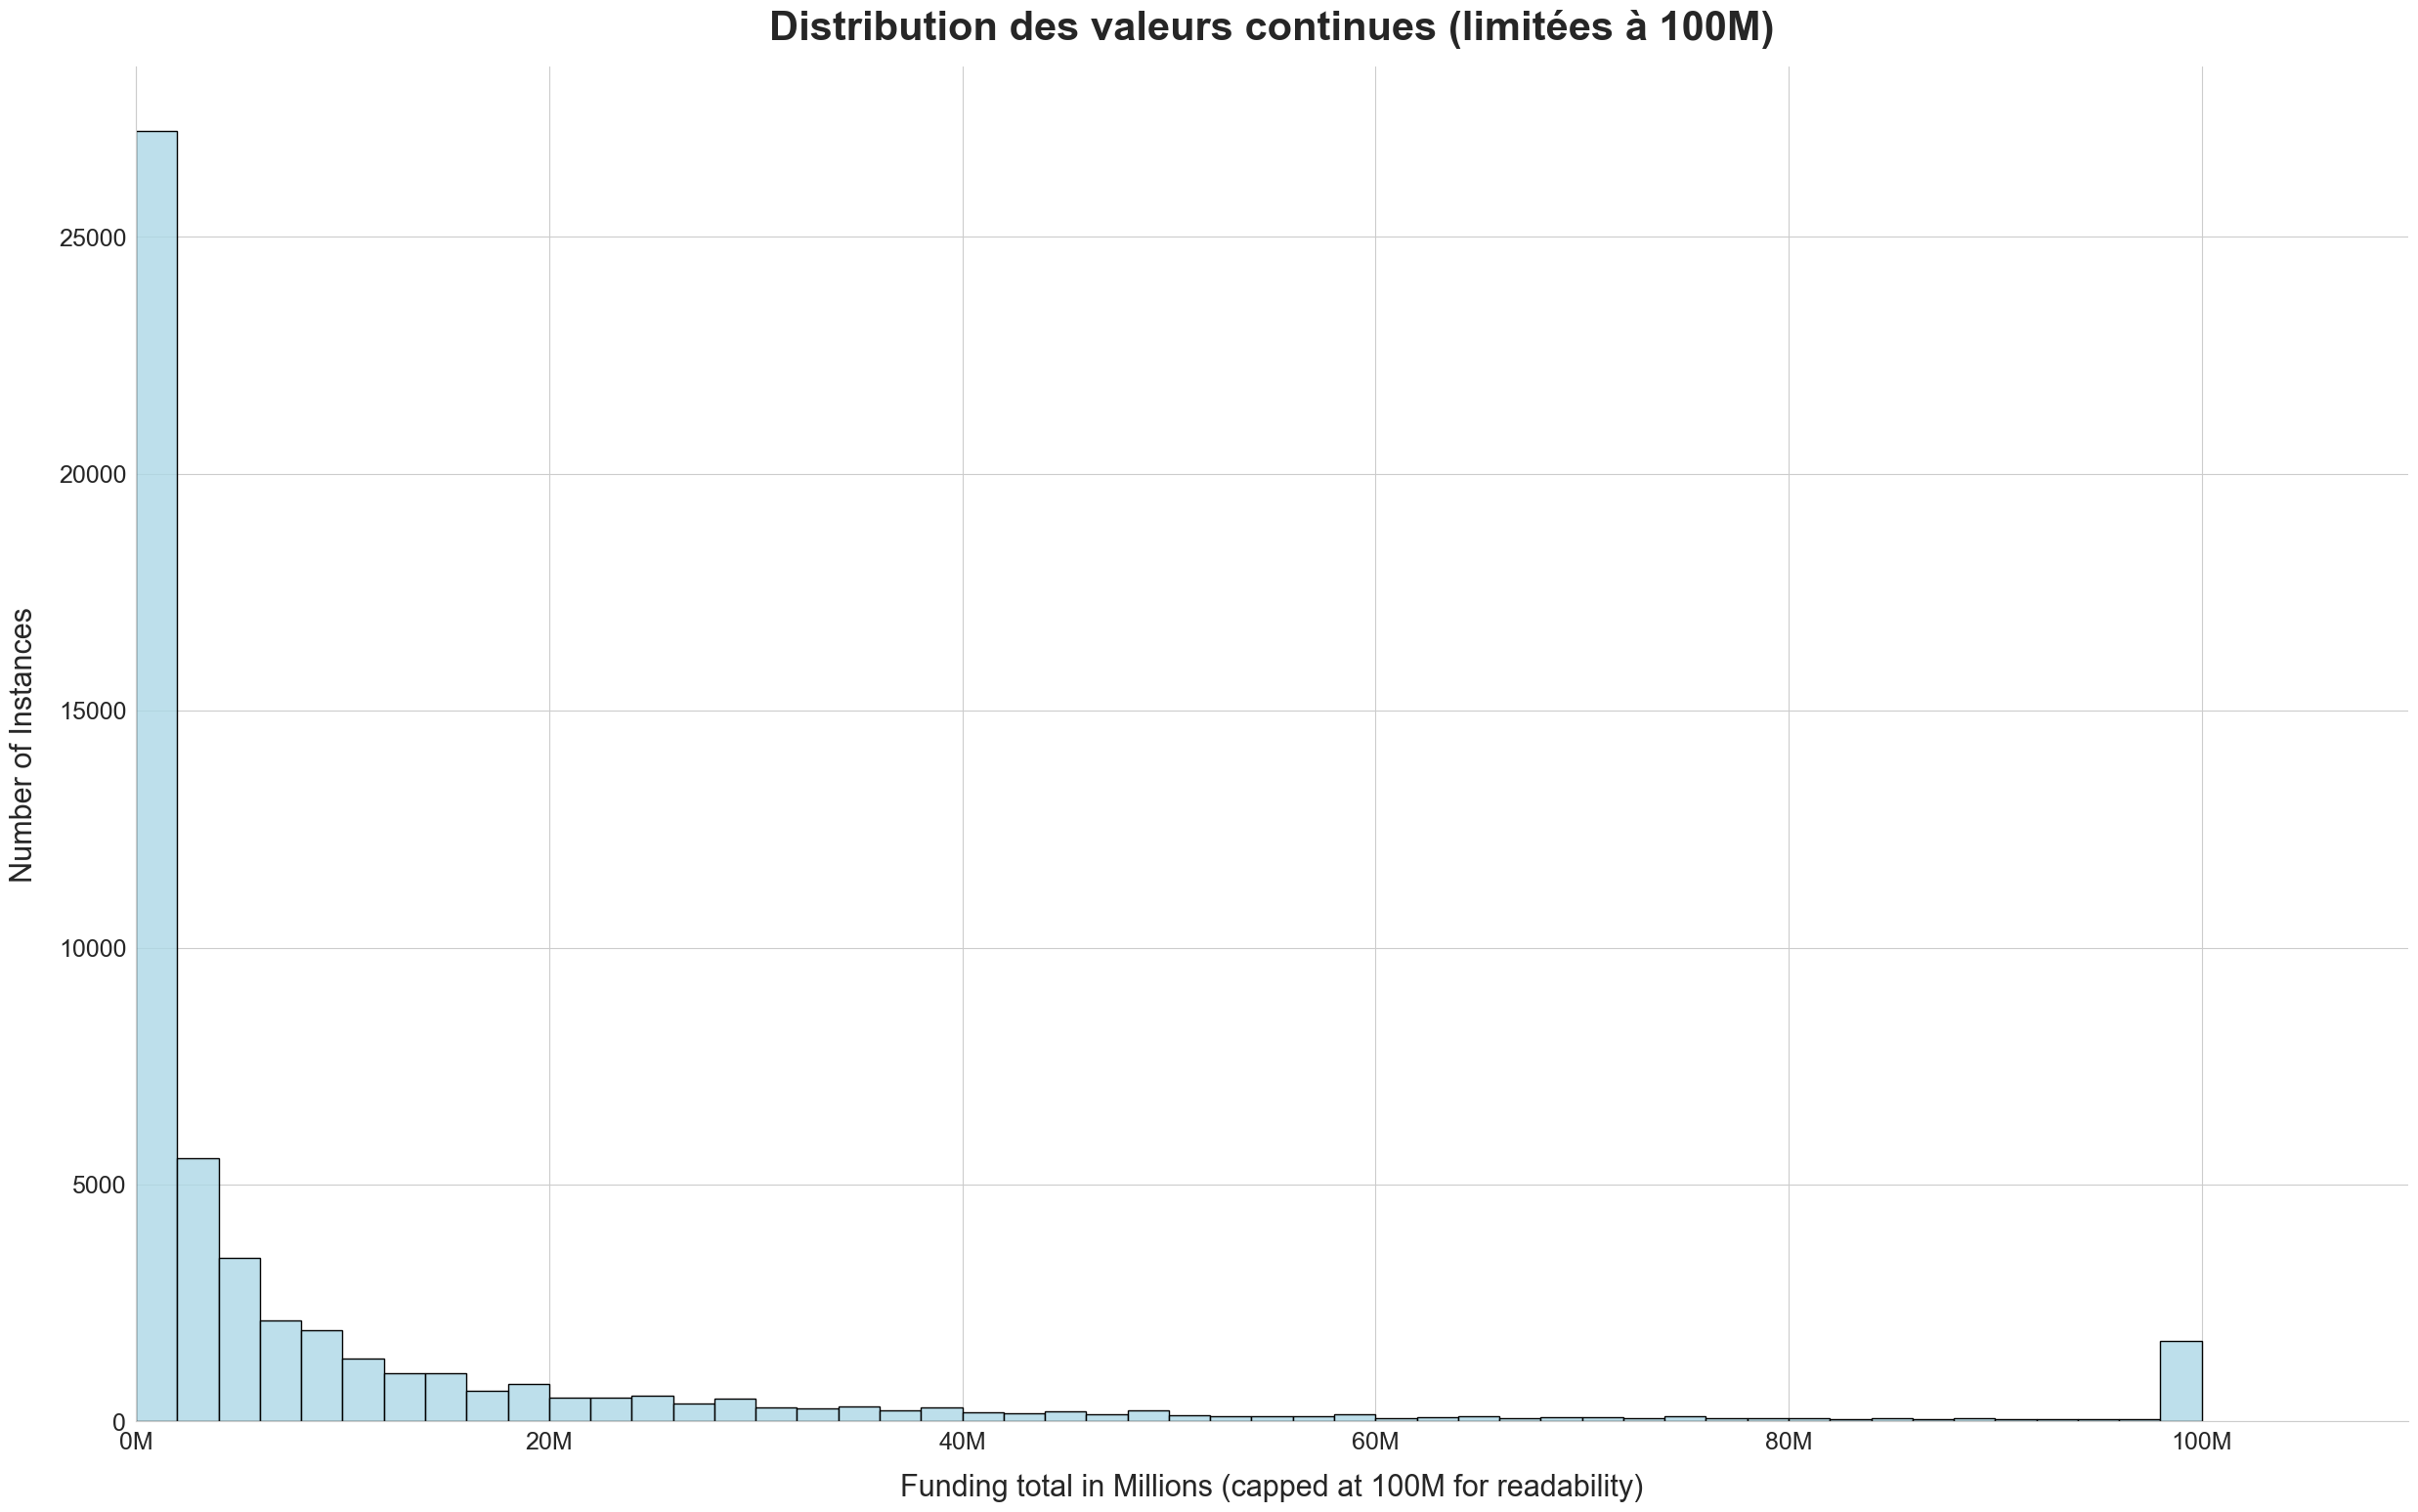

In [8]:

# Définir le style général
sns.set_style("whitegrid")

plt.figure(figsize=(30, 18))

# Remplacer les valeurs > 100M uniquement pour l'affichage
data = np.where(df["funding_total_usd"] > 100e6, 100e6, df["funding_total_usd"])


# Tracer l'histogramme avec transparence et des bords bien définis
sns.histplot(data, bins=50, color="lightblue", edgecolor="black", alpha=0.8)


# Reformater l’axe des X pour l’afficher en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Ajustement des ticks pour qu'ils soient plus visibles
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Définir les limites de l'axe X
plt.xlim(0, 110e6)

# Labels avec un meilleur espacement et un style plus clair
plt.xlabel("Funding total in Millions (capped at 100M for readability)", fontsize=22, labelpad=15)
plt.ylabel("Number of Instances", fontsize=22, labelpad=15)
plt.title("Distribution des valeurs continues (limitées à 100M)", fontsize=30, fontweight="bold", pad=20)
sns.despine()

plt.show()


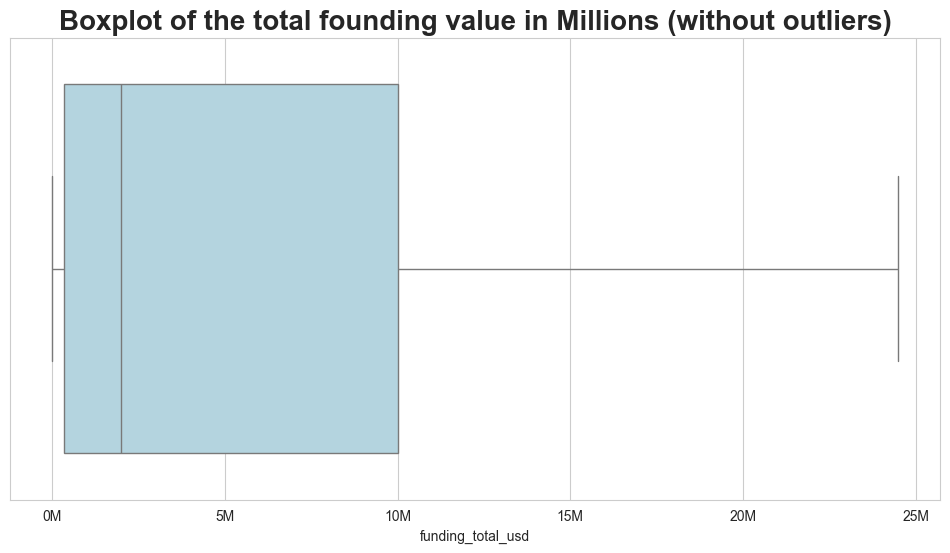

In [9]:
plt.figure(figsize=(12, 6))

# Afficher le boxplot sans les outliers
sns.boxplot(x=df["funding_total_usd"], showfliers=False, color='lightblue')

# Reformater l'axe des X en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.title("Boxplot of the total founding value in Millions (without outliers)", fontsize = 20, fontweight="bold")

plt.show()


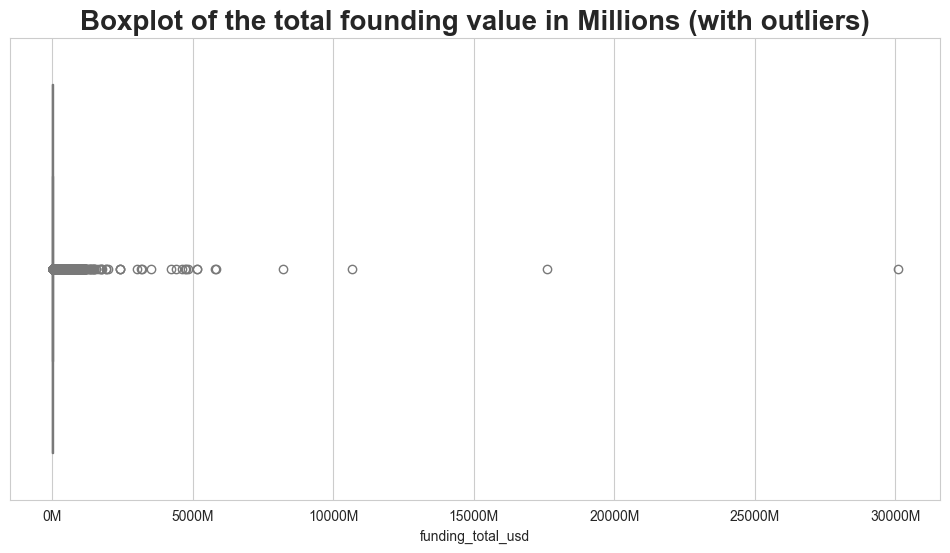

In [10]:
plt.figure(figsize=(12, 6))

# Afficher le boxplot sans les outliers
sns.boxplot(x=df["funding_total_usd"], showfliers=True, color='lightblue')

# Reformater l'axe des X en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))


plt.title("Boxplot of the total founding value in Millions (with outliers)", fontsize = 20, fontweight="bold")

plt.show()

In [11]:
df.drop(columns="country_code", inplace=True)

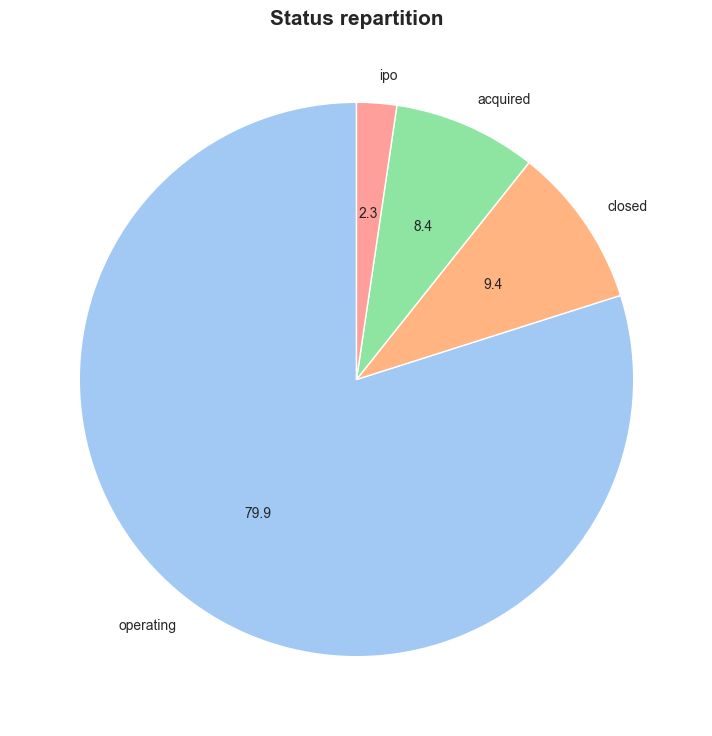

In [12]:
# Calculer les fréquences des valeurs de la colonne "status"
status_count = df["status"].value_counts()
colors = sns.color_palette("pastel", n_colors=len(status_count))
# Tracer le pie chart avec les labels et les pourcentages
plt.figure(figsize=(15, 9))
plt.pie(status_count, labels=status_count.index, autopct="%1.1f", startangle=90, colors=colors)
plt.title("Status repartition", fontsize = 15, fontweight = "bold")

plt.show()

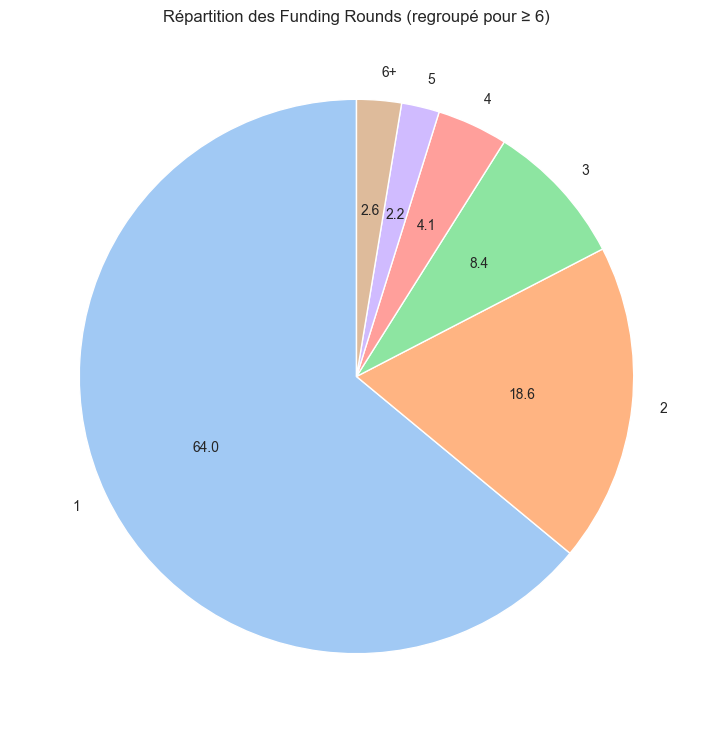

In [13]:
rounds_counts = df["funding_rounds"].value_counts()
colors = sns.color_palette("pastel", n_colors=len(rounds_counts))
# Séparer les valeurs < 6 et celles ≥ 6
rounds_counts_filtered = rounds_counts[rounds_counts.index < 6]  # Garde les valeurs < 7
rounds_6_plus = rounds_counts[rounds_counts.index >= 6].sum()  # Somme des valeurs ≥ 7

# Ajouter la nouvelle catégorie "7+" à la série filtrée
rounds_counts_filtered["6+"] = rounds_6_plus

# Tracer le camembert
plt.figure(figsize=(15, 9))
plt.pie(rounds_counts_filtered, labels=rounds_counts_filtered.index, autopct="%1.1f", startangle=90, colors=colors)
plt.title("Répartition des Funding Rounds (regroupé pour ≥ 6)")

plt.show()

In [14]:
df.columns

Index(['category_list', 'funding_total_usd', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')

In [15]:


df["founded_at"] = pd.to_datetime(df["founded_at"], format="%Y-%m-%d", errors="coerce")


In [16]:
founded_at_year =  df["founded_at"].dt.year.value_counts().sort_index()

In [17]:
founded_at_year = founded_at_year[founded_at_year>=100]

In [18]:
founded_at_year.index = founded_at_year.index.astype(int)


In [19]:
founded_at_year

founded_at
1989     112
1990     116
1991     117
1992     149
1993     176
1994     193
1995     271
1996     400
1997     458
1998     571
1999     949
2000    1080
2001     909
2002     911
2003    1076
2004    1281
2005    1559
2006    1967
2007    2531
2008    2626
2009    3323
2010    4253
2011    5624
2012    6425
2013    6259
2014    4964
2015    1578
Name: count, dtype: int64

C:\Users\theof\AppData\Local\Temp\ipykernel_9008\1293945657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=founded_at_year.index, y=founded_at_year.values, palette="crest", edgecolor = "black", alpha=0.8)


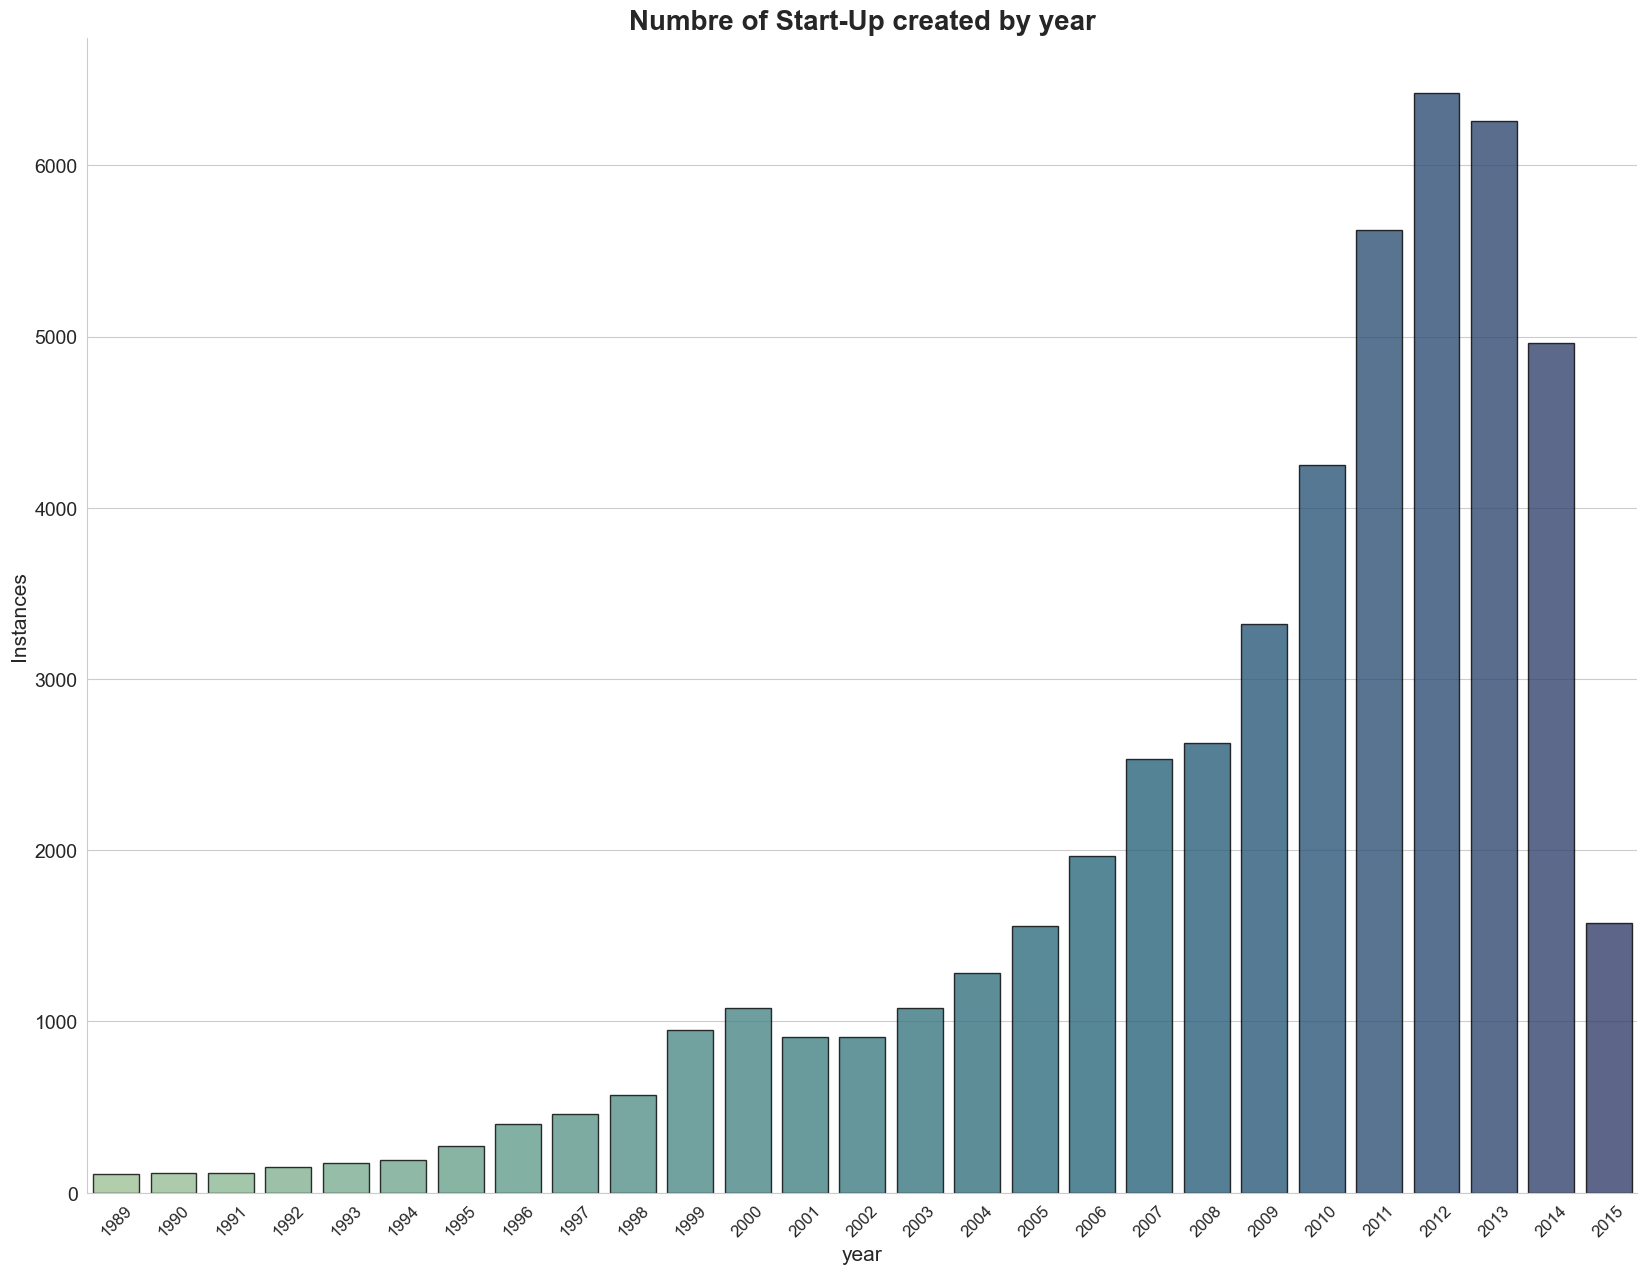

In [20]:

plt.figure(figsize=(20,15))
sns.barplot(x=founded_at_year.index, y=founded_at_year.values, palette="crest", edgecolor = "black", alpha=0.8)
plt.title("Numbre of Start-Up created by year", fontsize = 20, fontweight="bold")
plt.ylabel("Instances", fontsize=15)
plt.xlabel("year",fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

In [21]:
pd.to_datetime(df["first_funding_at"], format="%Y-%m-%d", errors="coerce")

0       2015-01-05
1       2014-03-01
2       2014-01-30
3       2008-03-19
4       2014-07-24
           ...    
66363   2012-04-01
66364   2011-11-01
66365   2014-08-01
66366   2015-01-01
66367   2013-10-01
Name: first_funding_at, Length: 66368, dtype: datetime64[ns]

In [22]:
import pandas as pd

# Vérifier le type de la colonne
print(df["first_funding_at"].dtype)  # Devrait être 'object' ou 'datetime64'

# Convertir en datetime
df["first_funding_at"] = pd.to_datetime(df["first_funding_at"], errors="coerce")

# Vérifier si la conversion a réussi
print(df["first_funding_at"].dtype)  # Devrait maintenant être 'datetime64[ns]'

# Extraire l'année et compter le nombre d'occurrences
first_funding_at_year = df["first_funding_at"].dt.year.value_counts().sort_index()

# Vérifier si l'index est float (ex: 1990.0), le convertir en int
first_funding_at_year.index = first_funding_at_year.index.astype(int)

# Afficher les premières valeurs
print(first_funding_at_year.head())


object
datetime64[ns]
first_funding_at
1960    1
1971    1
1973    1
1977    1
1979    1
Name: count, dtype: int64


In [23]:
first_funding_at_year =  df["first_funding_at"].dt.year.value_counts().sort_index()

C:\Users\theof\AppData\Local\Temp\ipykernel_9008\4241450147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_funding_at_year.index.astype(int), y=first_funding_at_year.values, palette="crest")


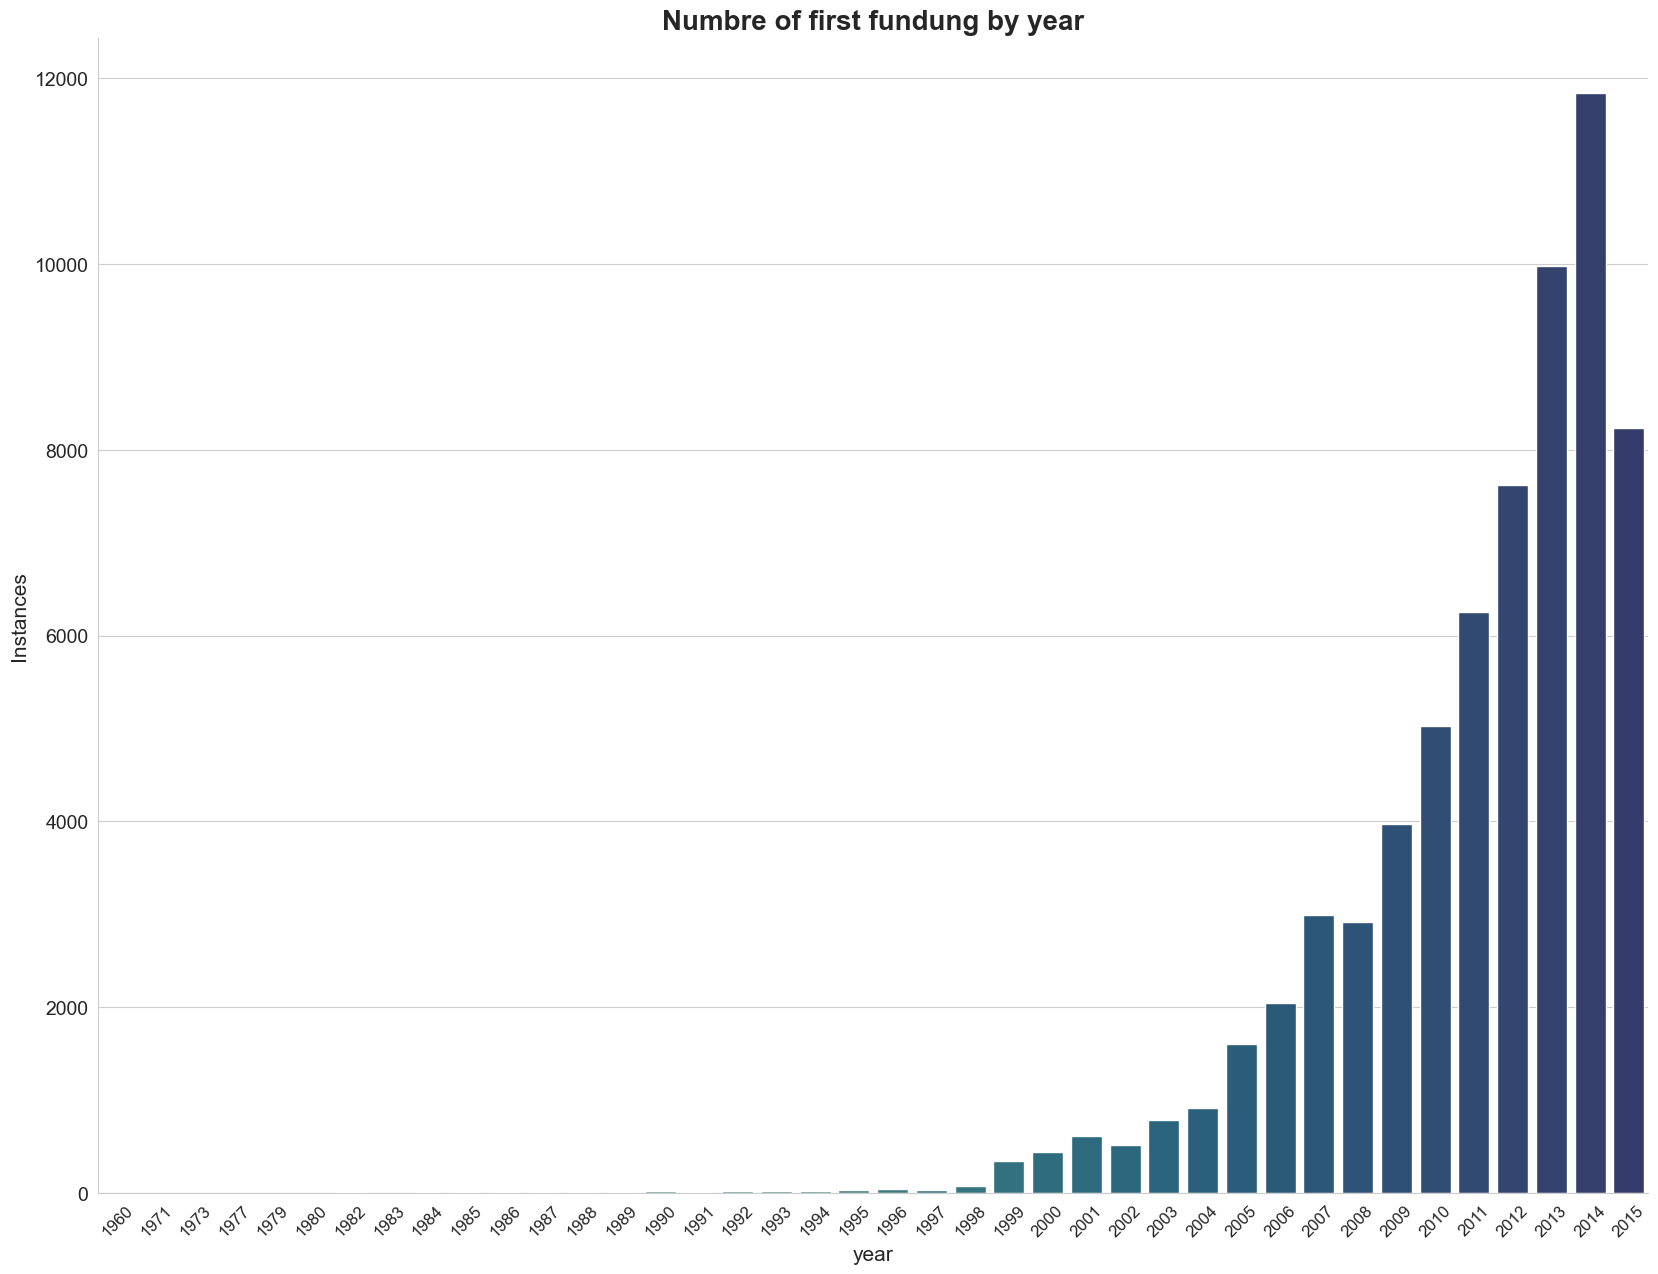

In [24]:
plt.figure(figsize=(20,15))
sns.barplot(x=first_funding_at_year.index.astype(int), y=first_funding_at_year.values, palette="crest")
plt.title("Numbre of first fundung by year", fontsize = 20, fontweight="bold")
plt.ylabel("Instances", fontsize=15)
plt.xlabel("year", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

In [25]:
df.columns

Index(['category_list', 'funding_total_usd', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')

In [26]:
df["last_funding_at"] = pd.to_datetime(df["last_funding_at"], format="%Y-%m-%d", errors="coerce")

In [27]:
last_founding_at_year = df["last_funding_at"].dt.year.value_counts().sort_index()

In [28]:
last_founding_at_year

last_funding_at
1971        1
1973        1
1977        1
1979        1
1980        1
1982        4
1983        1
1984        4
1985        5
1986        5
1987        6
1988        3
1989        8
1990       12
1991        9
1992       12
1993       15
1994       16
1995       19
1996       27
1997       20
1998       50
1999      227
2000      287
2001      414
2002      324
2003      549
2004      574
2005      884
2006     1215
2007     2105
2008     2271
2009     2916
2010     3983
2011     5088
2012     6380
2013     9495
2014    14574
2015    14859
2105        1
2115        1
Name: count, dtype: int64

C:\Users\theof\AppData\Local\Temp\ipykernel_9008\627408735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_founding_at_year.index.astype(int), y=last_founding_at_year.values, palette="crest")


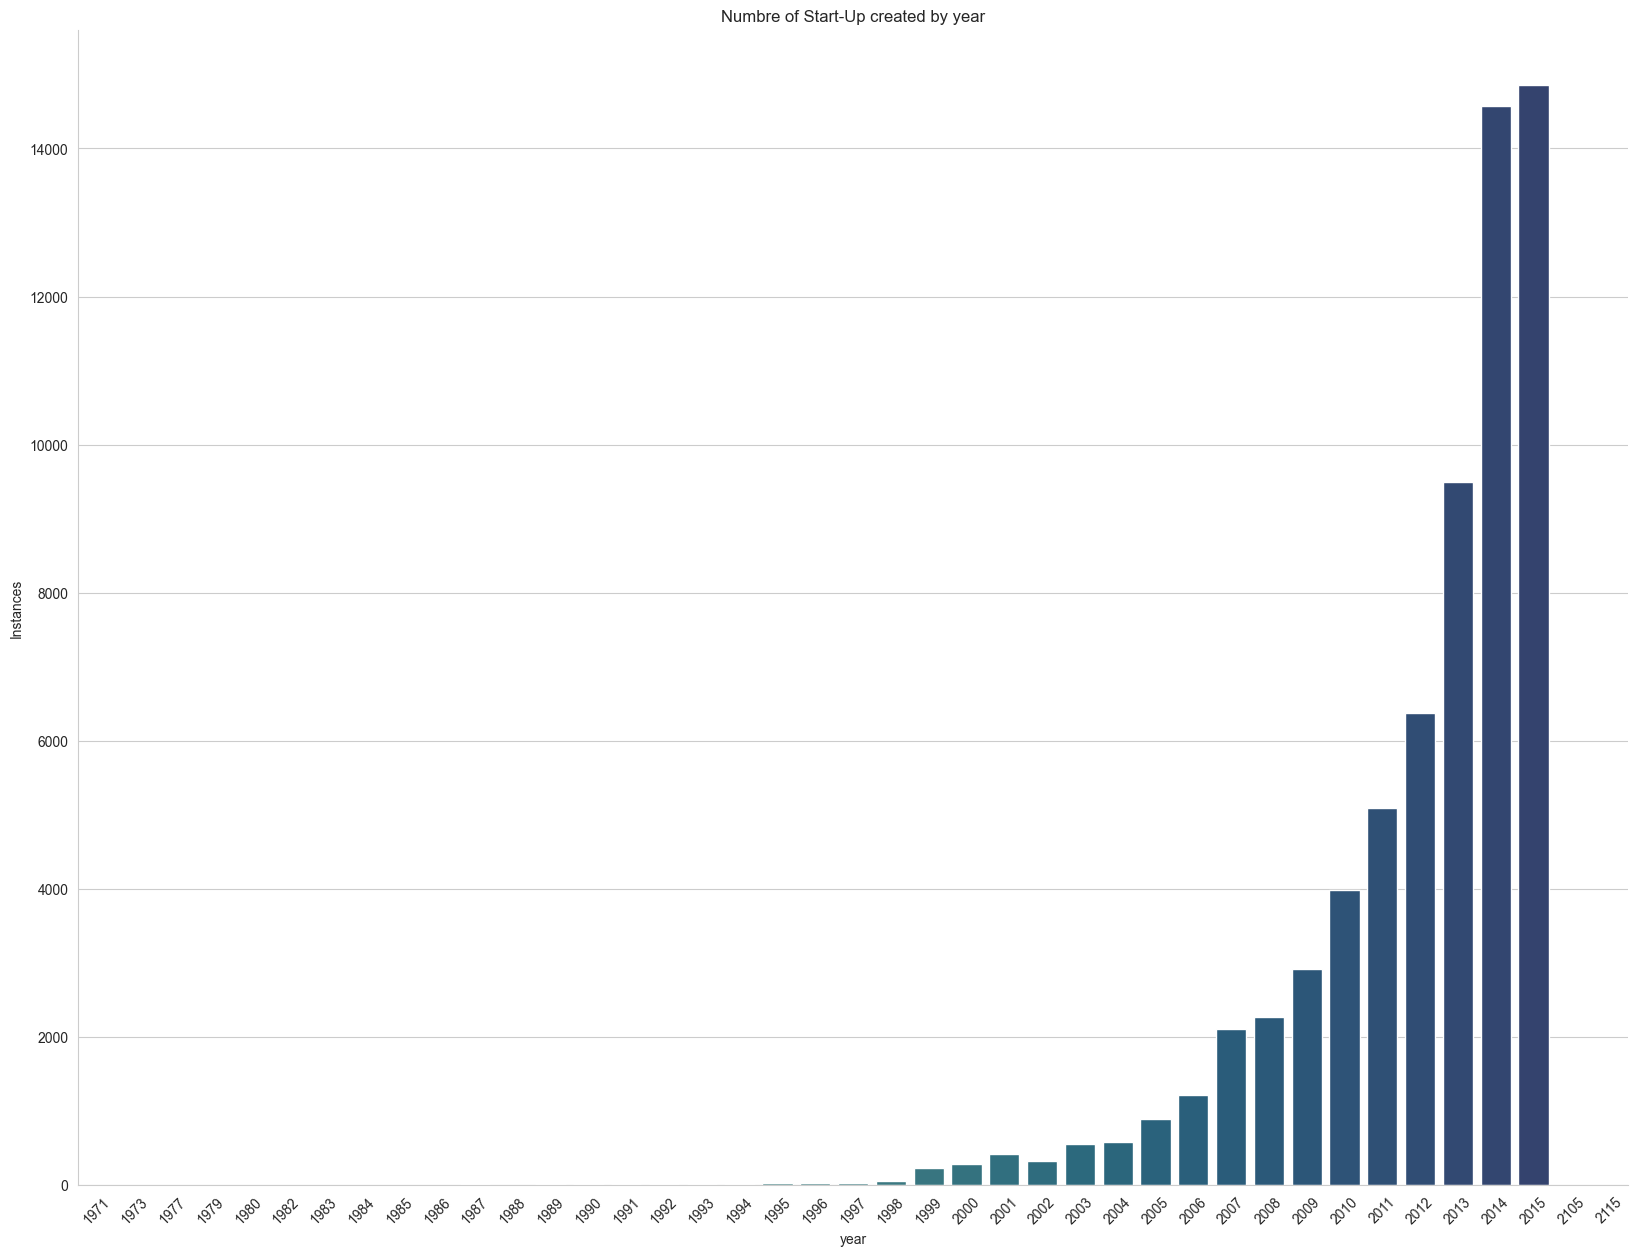

In [29]:
plt.figure(figsize=(20,15))
sns.barplot(x=last_founding_at_year.index.astype(int), y=last_founding_at_year.values, palette="crest")

plt.title("Numbre of Start-Up created by year")
plt.ylabel("Instances")
plt.xlabel("year")
plt.xticks(rotation=45)
sns.despine()
plt.show()

Analysis 

This is the questions we will try to find answers to : 

- Which sector is the best for starting a new Start-Up ?
- Is the number of found raising a good indicator of start-up success ?
- Which predictor influence the most the success or failure of start-ups ?

A start-up is considered a failure if closed

In [30]:
data = df

In [31]:
success = {'operating', 'ipo',"acquired"}

data['Success_bool'] = data['status'].isin(success).astype(int)

success_rate = data.groupby('category_list')['Success_bool'].mean() * 100  # En pourcentage

success_rate = success_rate.sort_values(ascending=False)

#We get rid of the Unknown category since this wouldn't give us any insight
success_rate.drop("unknown", inplace=True)

C:\Users\theof\AppData\Local\Temp\ipykernel_9008\391799736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(success_rate, palette="crest")


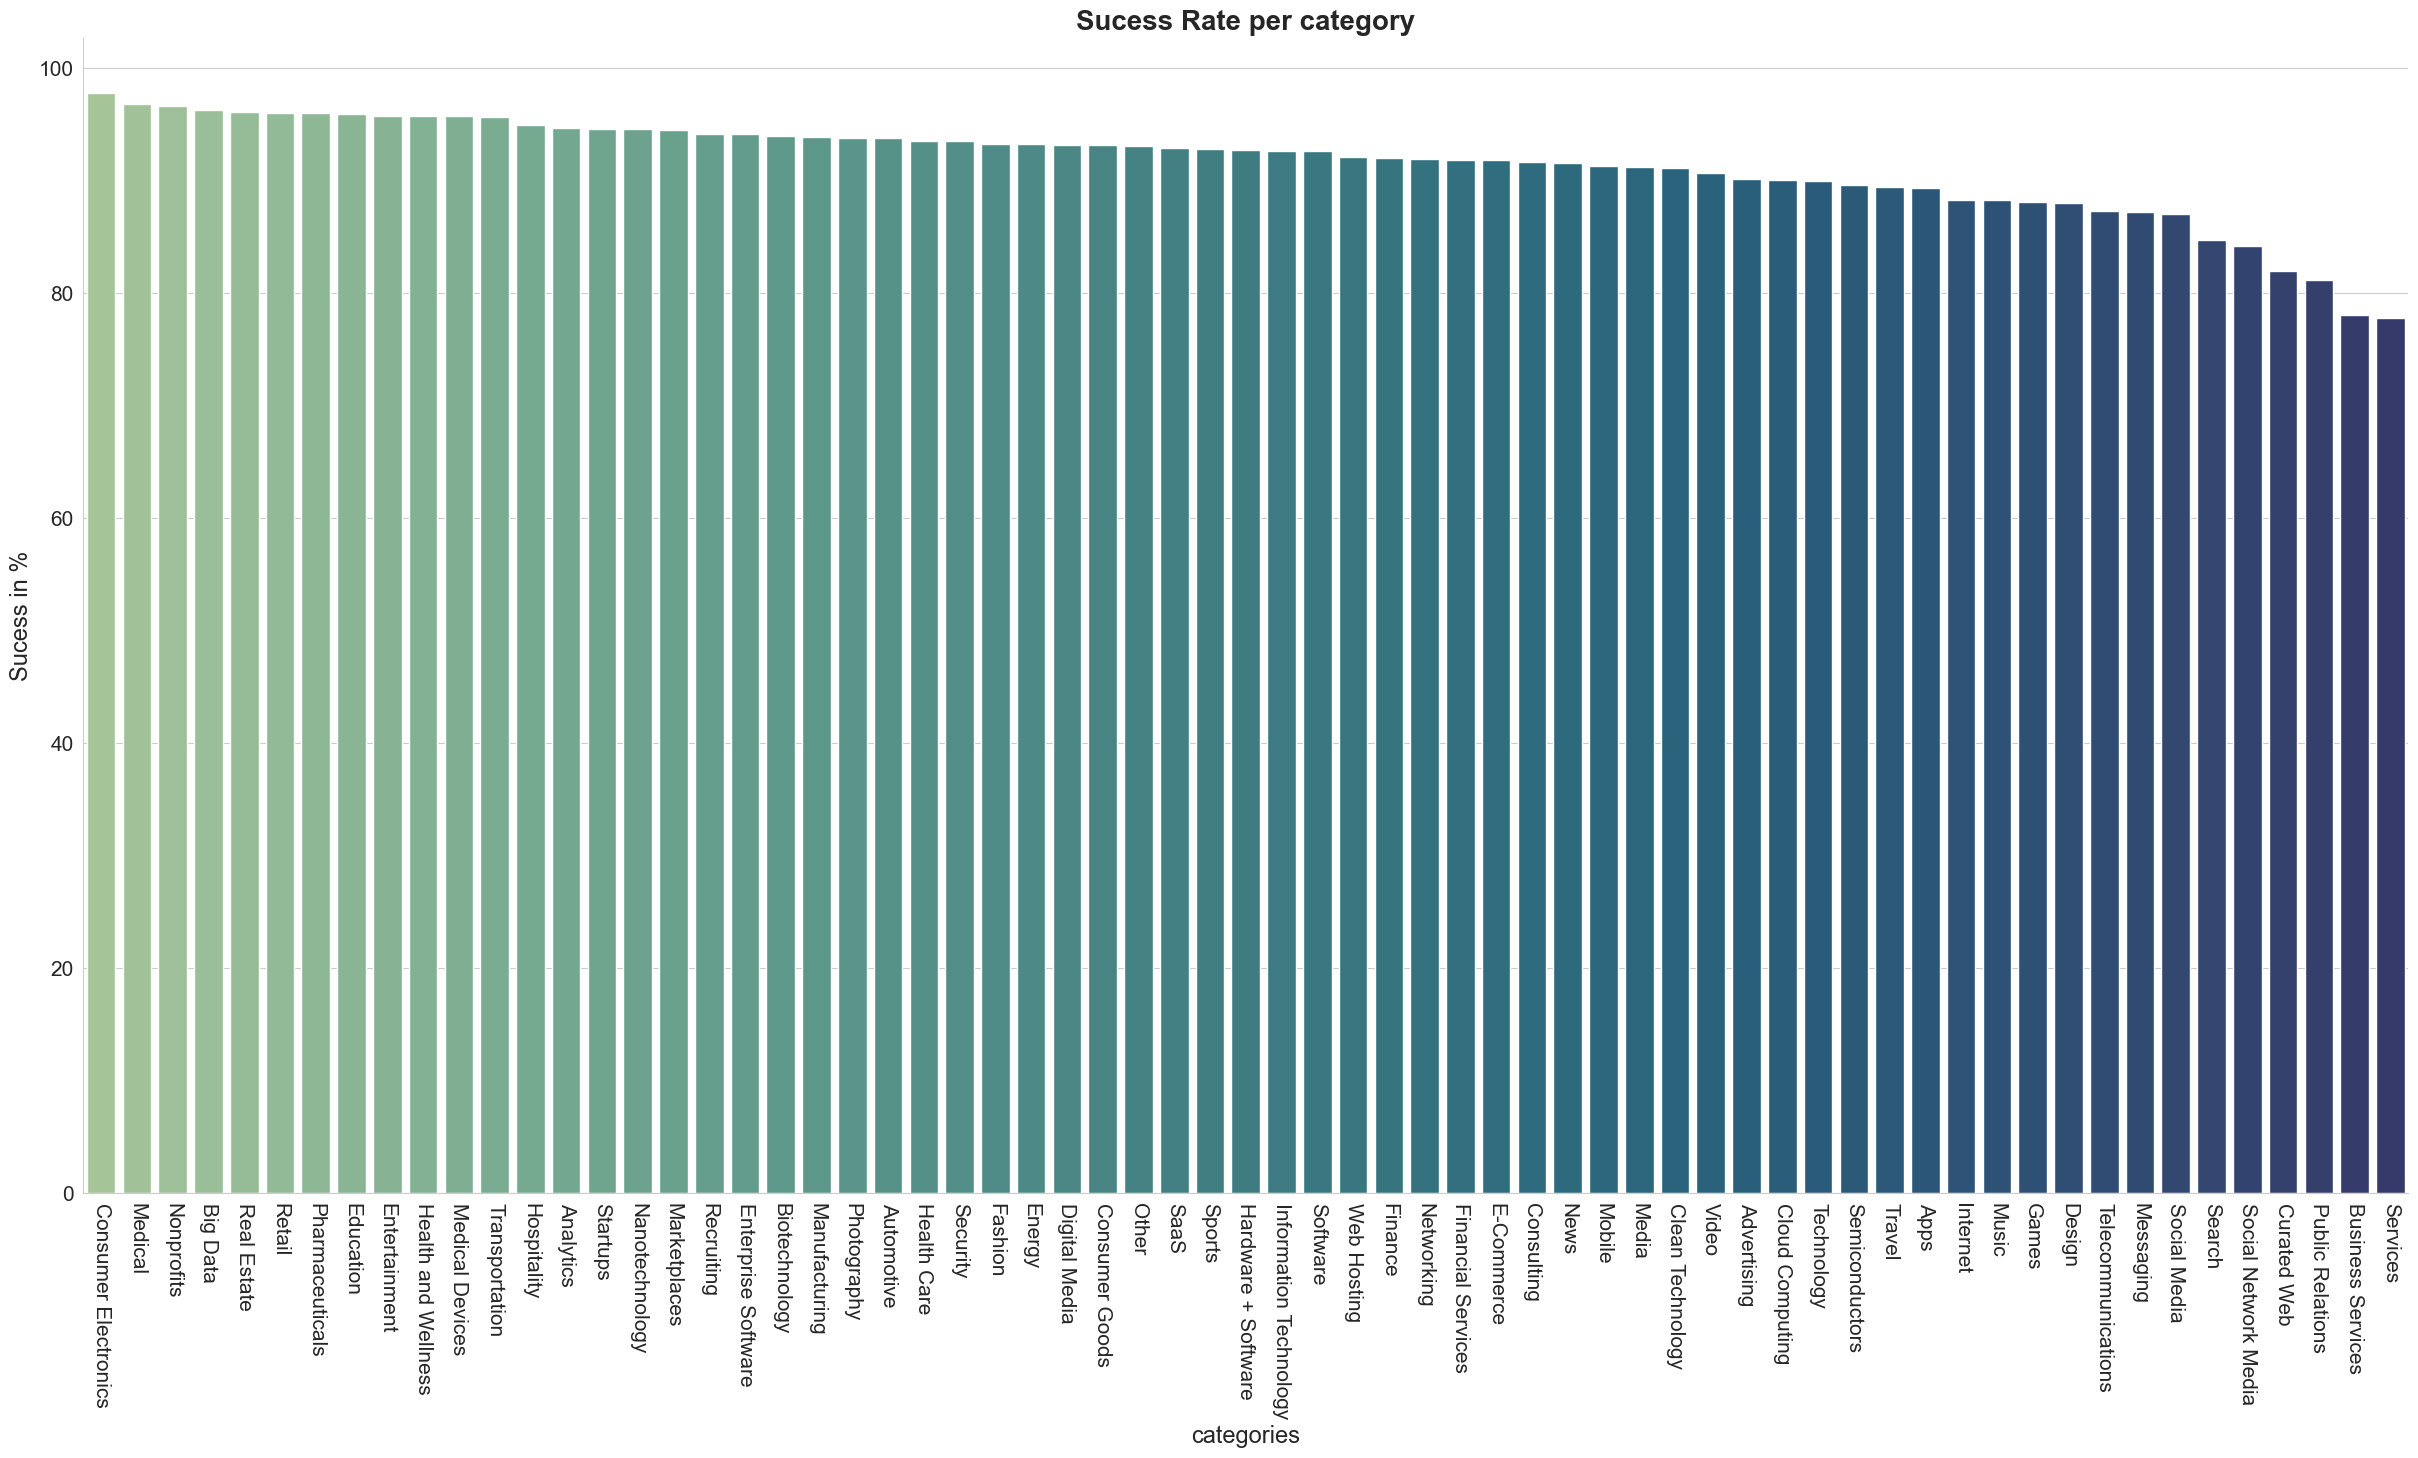

In [32]:
plt.figure(figsize=(30,15))
sns.barplot(success_rate, palette="crest")
plt.title("Sucess Rate per category", fontsize = 20, fontweight="bold")
plt.ylabel("Sucess in %", fontsize =17)
plt.xlabel("categories", fontsize = 17)
plt.xticks(rotation=-90, fontsize = 15)
plt.yticks(fontsize = 15)
sns.despine()
plt.show()

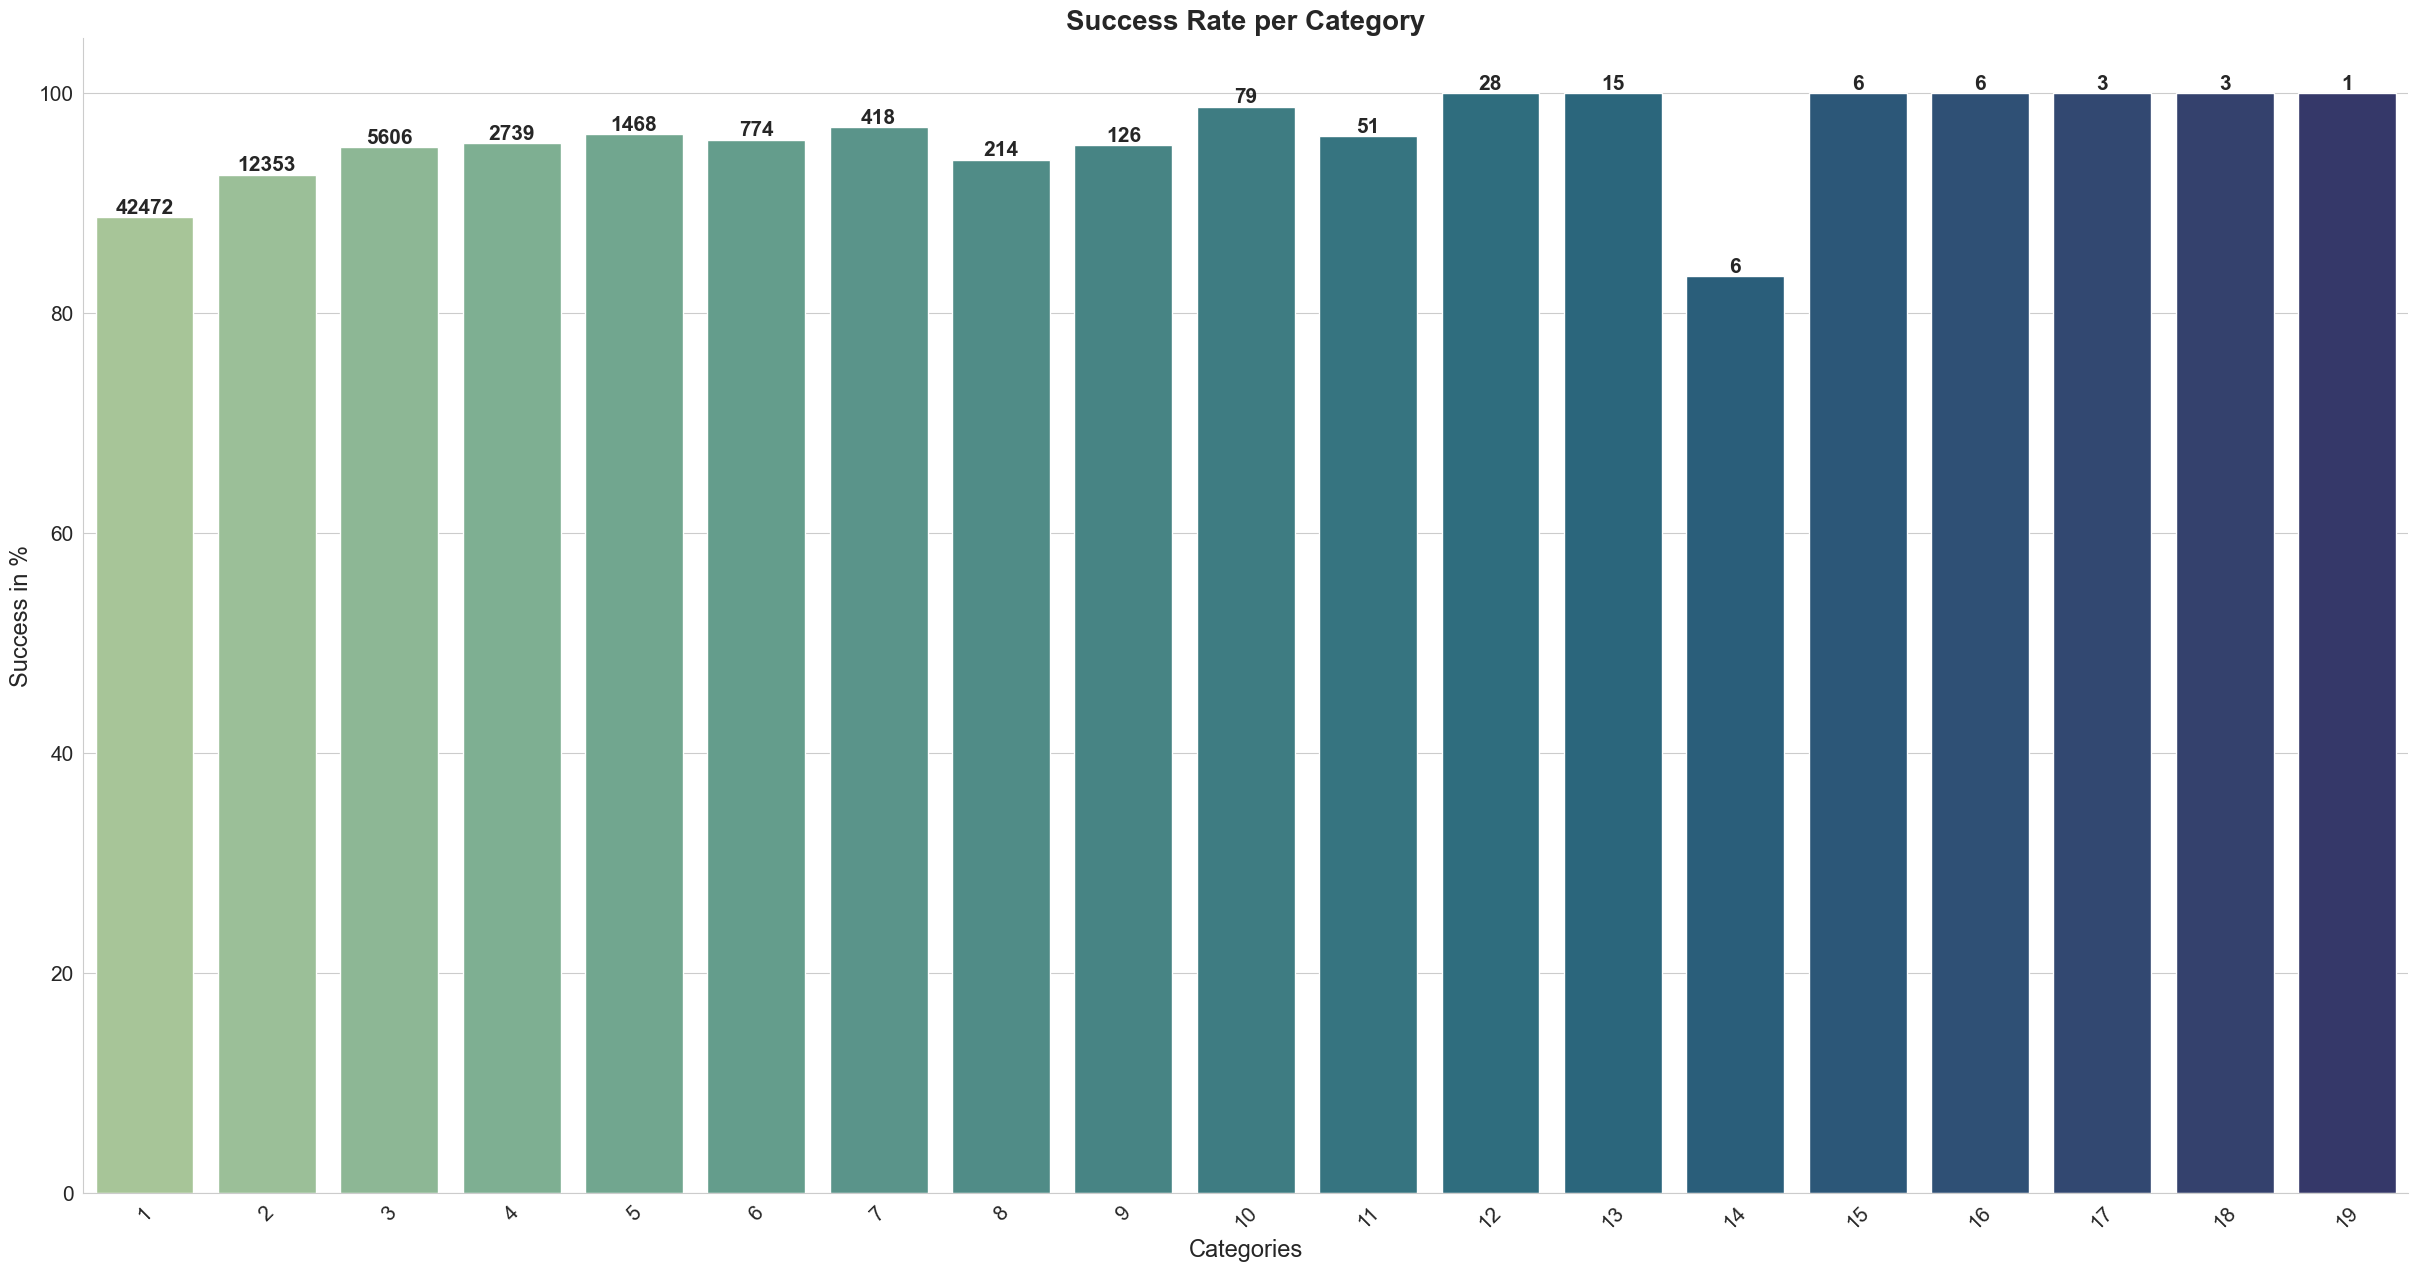

In [33]:
found_raising = data.groupby("funding_rounds")["Success_bool"].mean() * 100

numbre = data["funding_rounds"].value_counts()
numbre
numbre_values = numbre.values


plt.figure(figsize=(30,15))
ax = sns.barplot(x=found_raising.index, y=found_raising.values, palette="crest", hue=found_raising.index, legend=False)

# Ajout des valeurs au-dessus des barres (correction pour Seaborn récent)
for i, bar in enumerate(ax.patches):
    ax.annotate(f"{numbre_values[i]}",  # Texte personnalisé
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position
                ha='center', va='bottom', fontsize=15, fontweight='bold')

# Ajout des labels et mise en forme
plt.title("Success Rate per Category", fontsize=20, fontweight="bold")
plt.ylabel("Success in %", fontsize=17)
plt.xlabel("Categories", fontsize=17)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

sns.despine()
plt.show()

In [34]:
df

,category_list,funding_total_usd,status,funding_rounds,founded_at,first_funding_at,last_funding_at,Success_bool
0,Media,10000000.0,operating,1,NaT,2015-01-05,2015-01-05,1
1,Social Network Media,700000.0,operating,2,2014-09-04,2014-03-01,2014-10-14,1
2,Mobile,3406878.0,operating,1,NaT,2014-01-30,2014-01-30,1
3,Curated Web,2000000.0,operating,1,2007-01-01,2008-03-19,2008-03-19,1
4,Software,NaN,operating,1,2010-01-01,2014-07-24,2014-07-24,1
...,...,...,...,...,...,...,...,...
66363,Enterprise Software,1587301.0,operating,1,NaT,2012-04-01,2012-04-01,1
66364,Mobile,114304.0,operating,4,2012-05-13,2011-11-01,2014-03-01,1
66365,unknown,NaN,operating,1,2011-01-01,2014-08-01,2014-08-01,1
66366,Telecommunications,18192.0,operating,1,2014-01-01,2015-01-01,2015-01-01,1
